[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


id               0
author       83798
statement    83798
source       83798
date         83798
target       83798
dtype: int64
                                                  id author statement source  \
0  1,Maria Ramirez,“Fewer people came in under Pr...    NaN       NaN    NaN   
1  2,Sofia Ahmed,Donald Trump chose a provocative...    NaN       NaN    NaN   
2  3,Marta Campabadal,Elon Musk has invented a sm...    NaN       NaN    NaN   
3  4,Ciara O'Rourke,"“Kroger, Food Lion and Publi...    NaN       NaN    NaN   
4  5,Ciara O'Rourke,“Biden agreed to a recount” i...    NaN       NaN    NaN   

  date target                                       cleaned_text  
0  NaN    NaN  maria ramirezfewer people came in under presid...  
1  NaN    NaN  sofia ahmeddonald trump chose a provocative so...  
2  NaN    NaN  marta campabadalelon musk has invented a small...  
3  NaN    NaN  ciara orourkekroger food lion and publix annou...  
4  NaN    NaN  ciara orourkebiden agreed to a recount in 

<ipython-input-2-dd630f364fbc>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=df_word_freq, palette='viridis')


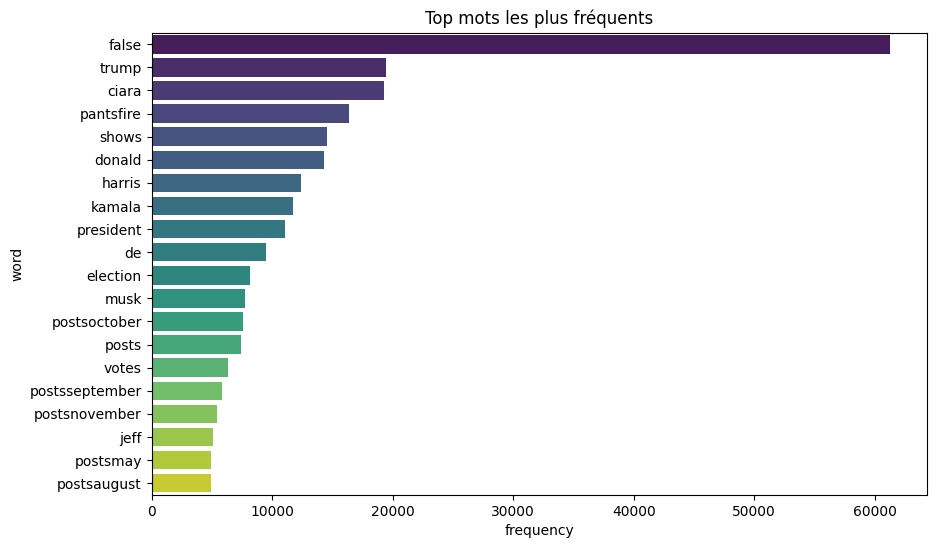

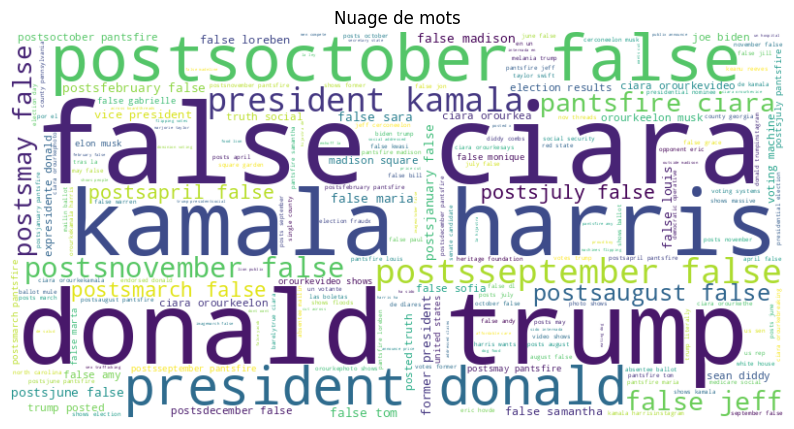

In [2]:
# Étape 1 : Charger les données
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Télécharger les ressources NLTK nécessaires
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') #


# Charger les données (remplacez "english-news.csv" par le fichier réel)
df = pd.read_csv("english-news.csv")

# Étape 2 : Gérer les valeurs manquantes
# Remplacez les NaN dans la colonne texte par des chaînes vides
text_column = 'id'  # Remplacez par le nom de votre colonne contenant le texte
df[text_column] = df[text_column].fillna("")

# Vérifiez les NaN restants dans d'autres colonnes
print(df.isna().sum())  # Affiche les colonnes et le nombre de valeurs manquantes

# Étape 3 : Nettoyage des données
import re
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+", "", text)  # Supprime les URL
    text = re.sub(r"@\w+", "", text)  # Supprime les mentions
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Supprime les caractères spéciaux
    text = text.lower()  # Convertit le texte en minuscules
    return text

df['cleaned_text'] = df[text_column].apply(clean_text)
print(df.head())

# Sauvegarder uniquement les données nettoyées dans un fichier CSV
output_file = "cleaned_data_only.csv"  # Nom du fichier de sortie
df_cleaned_only = df[['cleaned_text']]  # Ne garder que la colonne contenant les données nettoyées
df_cleaned_only.to_csv(output_file, index=False)  # Sauvegarde sans inclure l'index
print(f"Les données nettoyées ont été sauvegardées dans le fichier : {output_file}")

# Étape 4 : Tokenisation et suppression des stopwords
stop_words = set(stopwords.words("english"))  # Remplacez "english" par "french" si nécessaire
def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    return [word for word in words if word not in stop_words]

df['tokens'] = df['cleaned_text'].apply(tokenize_and_remove_stopwords)

# Étape 5 : Analyse des fréquences des mots
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Affichage des mots les plus fréquents
df_word_freq = pd.DataFrame(common_words, columns=['word', 'frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=df_word_freq, palette='viridis')
plt.title("Top mots les plus fréquents")
plt.show()

# Étape 6 : Générer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots")
plt.show()
